
【練習問題】銀行の顧客ターゲティング
顧客の属性情報などから定期預金キャンペーンの反応率を予測しよう。
https://signate.jp/competitions/1/data


## import dependencies

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv",header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [14]:
train.head()
trainX = train.iloc[:,0:17]

In [15]:
test.shape

(18083, 17)

In [16]:
trainX

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,blue-collar,married,primary,no,1455,yes,no,cellular,2,feb,279,2,269,2,other
27124,27125,34,services,single,secondary,no,719,yes,no,unknown,15,may,362,3,-1,0,unknown
27125,27126,36,blue-collar,single,primary,no,49,yes,no,unknown,8,may,405,1,-1,0,unknown
27126,27127,33,housemaid,married,primary,no,209,no,no,cellular,12,aug,76,4,-1,0,unknown


In [17]:
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,blue-collar,married,primary,no,1455,yes,no,cellular,2,feb,279,2,269,2,other,0
27124,27125,34,services,single,secondary,no,719,yes,no,unknown,15,may,362,3,-1,0,unknown,0
27125,27126,36,blue-collar,single,primary,no,49,yes,no,unknown,8,may,405,1,-1,0,unknown,0
27126,27127,33,housemaid,married,primary,no,209,no,no,cellular,12,aug,76,4,-1,0,unknown,0


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [18]:
y = train["y"]

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [19]:
testX = test.copy()

## trainXとtestXをダミー変数化しましょう

In [20]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)
testX

,id,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,30,1028,4,1294,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,39,426,18,1029,1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,38,-572,5,26,24,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,34,-476,27,92,4,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,37,62,31,404,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18079,30,32,6,122,3,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
18079,18080,35,1557,5,225,1,268,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18080,18081,33,1713,8,22,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
18081,18082,37,-251,12,146,3,370,1,0,1,...,0,0,1,0,0,0,1,0,0,0


## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [21]:
clf1 = DT(max_depth=2,min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [22]:
cross_validate(clf1,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([0.09274006, 0.0849247 , 0.09772563, 0.07665062, 0.06049299]),
 'score_time': array([0.0116117 , 0.00925207, 0.00933719, 0.00974441, 0.00675821]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [23]:
clf2 = DT(max_depth=10,min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [24]:
cross_validate(clf2,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([0.19735837, 0.18329453, 0.20011306, 0.22306132, 0.12467027]),
 'score_time': array([0.00938106, 0.00991273, 0.01933885, 0.01041245, 0.00726581]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.8924153 , 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [25]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [26]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [27]:
parameters = {"max_depth":list(range(2,11))}

In [28]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [29]:
gcv = GridSearchCV(clf3,parameters,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

## グリッドサーチの結果を見てみましょう
- cv_results_で結果を見る事が出来ます

In [30]:
gcv.cv_results_

{'mean_fit_time': array([0.08122993, 0.10205617, 0.13145728, 0.16023078, 0.17544117,
        0.20598607, 0.22841582, 0.24556026, 0.26308846]),
 'mean_score_time': array([0.00946908, 0.00955019, 0.01082301, 0.01153045, 0.00988812,
        0.0112555 , 0.01040726, 0.00980921, 0.00938478]),
 'mean_test_score': array([0.74715097, 0.80745683, 0.81411275, 0.82270119, 0.82750619,
        0.82337505, 0.80674035, 0.79322344, 0.77961179]),
 'mean_train_score': array([0.74831988, 0.8124462 , 0.84413528, 0.85725834, 0.86924573,
        0.88601102, 0.89893292, 0.91021996, 0.92416835]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'ran

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [31]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

In [32]:
#train_score
test_score

array([0.74715097, 0.80745683, 0.81411275, 0.82270119, 0.82750619,
       0.82337505, 0.80674035, 0.79322344, 0.77961179])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x7f41fa974690>,
 [Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11')])

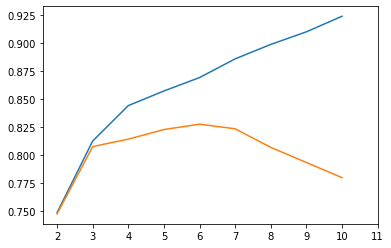

In [33]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[2,3,4,5,6,7,8,9,10,11])

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [34]:
gcv.best_params_

{'max_depth': 6}

In [35]:
gcv.cv_results_

{'mean_fit_time': array([0.08122993, 0.10205617, 0.13145728, 0.16023078, 0.17544117,
        0.20598607, 0.22841582, 0.24556026, 0.26308846]),
 'mean_score_time': array([0.00946908, 0.00955019, 0.01082301, 0.01153045, 0.00988812,
        0.0112555 , 0.01040726, 0.00980921, 0.00938478]),
 'mean_test_score': array([0.74715097, 0.80745683, 0.81411275, 0.82270119, 0.82750619,
        0.82337505, 0.80674035, 0.79322344, 0.77961179]),
 'mean_train_score': array([0.74831988, 0.8124462 , 0.84413528, 0.85725834, 0.86924573,
        0.88601102, 0.89893292, 0.91021996, 0.92416835]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'ran

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [36]:
pred = gcv.predict_proba(testX)

In [37]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [38]:
sample[1] = pred

In [39]:
sample.to_csv("submit3_bank.csv",index=None,header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [59]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [60]:
parameters2 = {"max_depth":[2,3,4,5,6,7,8,9,10], "min_samples_leaf":[5,10,20,50,100,500]} 
#parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [61]:
gcv2 = GridSearchCV(clf4,parameters2,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

4.最適なパラメータはなんだったか確かめてみよう

In [62]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [63]:
pred2 = gcv2.predict_proba(testX)

In [131]:
pred2

array([0.81355932, 0.58333333, 0.01083477, ..., 0.01083477, 0.01083477,
       0.01083477])

In [65]:
pred2 = pred2[:,1]
# １となる確率　[:,1]　

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [66]:
sample[1] = pred2

In [67]:
sample

,0,1
0,1,0.813559
1,2,0.583333
2,3,0.010835
3,4,0.010835
4,5,0.130498
...,...,...
18078,18079,0.010835
18079,18080,0.189655
18080,18081,0.010835
18081,18082,0.010835


In [68]:
sample.to_csv("submit4_bank.csv",index=None,header=None)

In [69]:
# use H2O AutoML model

# H2O AutoML で予測してみる

参考URL：

AutoML: Automatic Machine Learning

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

Automated Machine Learning using H2O AutoML

https://www.youtube.com/watch?v=91QljBnvM7s

In [40]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [41]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 49 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=220c4eea3cb2a2ff7b6820f3de4ce294ffc4a5f7c5bd98e9a6274f9a0bf53b0f
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


In [42]:
import h2o
from h2o.automl import H2OAutoML

In [43]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgo8npv3c
  JVM stdout: /tmp/tmpgo8npv3c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgo8npv3c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,"7 days, 14 hours and 43 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_mlexap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [44]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("/content/train.csv")
test = h2o.import_file("/content/test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
train.columns

['id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [46]:
train.shape

(27128, 18)

In [47]:
df_train,df_test,df_valid = train.split_frame(ratios=[.7, .15])

In [48]:
print(df_train.shape, df_test.shape, df_valid.shape)

(19059, 18) (4030, 18) (4039, 18)


In [49]:
#aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["DeepLearning"], verbosity="info", nfolds=0)
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [50]:
# Identify predictors and response
x = train.columns
y = "y"
x.remove(y)

In [51]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

In [52]:
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
08:17:09.771: Project: AutoML_1_20220716_81709
08:17:09.773: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:17:09.773: Setting stopping tolerance adaptively based on the training frame: 0.007243524693244028
08:17:09.774: Build control seed: 10
08:17:09.774: training frame: Frame key: AutoML_1_20220716_81709_training_py_2_sid_a6c4    cols: 18    rows: 19059  chunks: 8    size: 398684  checksum: -2580236388130162937
08:17:09.775: validation frame: Frame key: py_4_sid_a6c4    cols: 18    rows: 4039  chunks: 8    size: 113783  checksum: 2578747412901407702
08:17:09.775: leaderboard frame: Frame key: py_4_sid_a6c4    cols: 18    rows: 4039  chunks: 8    size: 113783  checksum: 2578747412901407702
08:17:09.775: blending frame: NULL
08:17:09.775: response column: y
08:17:09.776: fold column: null
08:17:09.776: weights column: null
08:17:09.801: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,65.0,65.0,81625.0,13.0,15.0,14.938461,41.0,117.0,94.8




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0500399640936687
RMSE: 0.2236961423307713
MAE: 0.12054914247871056
RMSLE: 0.15653145415604772
Mean Residual Deviance: 0.0500399640936687

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.0634641175418991
RMSE: 0.25192085571047723
MAE: 0.1348586677817229
RMSLE: 0.17605048177180427
Mean Residual Deviance: 0.0634641175418991

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-07-16 08:17:18,0.014 sec,0.0,0.321489,0.206710,0.103355,0.324776,0.208835,0.105480
1,,2022-07-16 08:17:19,1.000 sec,5.0,0.291068,0.184948,0.084720,0.296758,0.188352,0.088065
2,,2022-07-16 08:17:19,1.532 sec,10.0,0.267162,0.163954,0.071376,0.274680,0.168234,0.075449
3,,2022-07-16 08:17:20,2.050 sec,15.0,0.253920,0.148726,0.064475,0.262989,0.153634,0.069163
4,,2022-07-16 08:17:20,2.469 sec,20.0,0.247633,0.139246,0.061322,0.258892,0.145277,0.067025
5,,2022-07-16 08:17:21,2.865 sec,25.0,0.243242,0.133546,0.059167,0.256210,0.140420,0.065643
6,,2022-07-16 08:17:21,3.293 sec,30.0,0.240325,0.130029,0.057756,0.254848,0.137646,0.064948
7,,2022-07-16 08:17:21,3.758 sec,35.0,0.237411,0.127883,0.056364,0.254127,0.136709,0.064581
8,,2022-07-16 08:17:22,4.141 sec,40.0,0.234280,0.126035,0.054887,0.253455,0.136100,0.064240
9,,2022-07-16 08:17:22,4.499 sec,45.0,0.231452,0.124611,0.053570,0.252963,0.135750,0.063990



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,1875.829346,1.000000,0.379757
1,month,782.339111,0.417063,0.158383
2,poutcome,637.376221,0.339784,0.129035
3,job,330.592010,0.176238,0.066928
4,day,255.374756,0.136140,0.051700
5,age,196.911423,0.104973,0.039864
6,pdays,177.271362,0.094503,0.035888
7,housing,166.049225,0.088520,0.033616
8,contact,163.258530,0.087033,0.033051
9,id,108.375786,0.057775,0.021940


In [53]:
lb = aml.leaderboard

In [54]:
df_pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [55]:
df_pred.head()

predict
0.674422
0.592158
0.0242714
0.0200732
0.112851
0.0296987
-0.00119116
0.0359079
-0.00140802
0.173309


In [56]:
aml.leader.model_performance(test)

In [57]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in mode_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [58]:
model_ids

['GBM_1_AutoML_1_20220716_81709',
 'GBM_3_AutoML_1_20220716_81709',
 'DRF_1_AutoML_1_20220716_81709',
 'GBM_4_AutoML_1_20220716_81709',
 'XRT_1_AutoML_1_20220716_81709',
 'GBM_2_AutoML_1_20220716_81709',
 'XGBoost_3_AutoML_1_20220716_81709',
 'XGBoost_2_AutoML_1_20220716_81709',
 'GLM_1_AutoML_1_20220716_81709',
 'XGBoost_1_AutoML_1_20220716_81709']

In [59]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220716_81709


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.049791942716794636
RMSE: 0.223141082539264
MAE: 0.11938259716868069
RMSLE: 0.15627601485442574
Mean Residual Deviance: 0.049791942716794636

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.06706338504540944
RMSE: 0.258965992063455
MAE: 0.13782158407665593
RMSLE: 0.18076109582274302
Mean Residual Deviance: 0.06706338504540944

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-07-16 08:17:41,0.002 sec,0.0,0.500000,0.500000,0.250000,0.500000,0.500000,0.250000
1,,2022-07-16 08:17:41,0.446 sec,5.0,0.275232,0.209655,0.075752,0.284343,0.215297,0.080851
2,,2022-07-16 08:17:41,0.753 sec,10.0,0.248427,0.144067,0.061716,0.263037,0.152706,0.069189
3,,2022-07-16 08:17:42,0.936 sec,15.0,0.242576,0.131667,0.058843,0.260121,0.141599,0.067663
4,,2022-07-16 08:17:42,1.244 sec,20.0,0.236936,0.127240,0.056139,0.259319,0.139336,0.067246
5,,2022-07-16 08:17:42,1.557 sec,25.0,0.232940,0.125017,0.054261,0.259423,0.138845,0.067300
6,,2022-07-16 08:17:43,1.854 sec,30.0,0.229327,0.123215,0.052591,0.259171,0.138740,0.067170
7,,2022-07-16 08:17:43,2.185 sec,35.0,0.226563,0.121657,0.051331,0.259542,0.138795,0.067362
8,,2022-07-16 08:17:43,2.503 sec,40.0,0.223141,0.119383,0.049792,0.258966,0.137822,0.067063



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,666.276978,1.000000,0.379064
1,poutcome.success,264.158936,0.396470,0.150288
2,age,97.818916,0.146814,0.055652
3,day,93.028824,0.139625,0.052927
4,pdays,62.361710,0.093597,0.035479
5,id,57.893810,0.086892,0.032937
6,balance,55.216106,0.082873,0.031414
7,housing.yes,48.066208,0.072141,0.027346
8,contact.unknown,46.954147,0.070472,0.026714
9,month.mar,45.924572,0.068927,0.026128



See the whole table with table.as_data_frame()


In [60]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [61]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'reg:squarederror',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'tree_method': 'exact'},
 10000)

In [62]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220716_81709


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.049791942716794636
RMSE: 0.223141082539264
MAE: 0.11938259716868069
RMSLE: 0.15627601485442574
Mean Residual Deviance: 0.049791942716794636

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.06706338504540944
RMSE: 0.258965992063455
MAE: 0.13782158407665593
RMSLE: 0.18076109582274302
Mean Residual Deviance: 0.06706338504540944

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-07-16 08:17:41,0.002 sec,0.0,0.500000,0.500000,0.250000,0.500000,0.500000,0.250000
1,,2022-07-16 08:17:41,0.446 sec,5.0,0.275232,0.209655,0.075752,0.284343,0.215297,0.080851
2,,2022-07-16 08:17:41,0.753 sec,10.0,0.248427,0.144067,0.061716,0.263037,0.152706,0.069189
3,,2022-07-16 08:17:42,0.936 sec,15.0,0.242576,0.131667,0.058843,0.260121,0.141599,0.067663
4,,2022-07-16 08:17:42,1.244 sec,20.0,0.236936,0.127240,0.056139,0.259319,0.139336,0.067246
5,,2022-07-16 08:17:42,1.557 sec,25.0,0.232940,0.125017,0.054261,0.259423,0.138845,0.067300
6,,2022-07-16 08:17:43,1.854 sec,30.0,0.229327,0.123215,0.052591,0.259171,0.138740,0.067170
7,,2022-07-16 08:17:43,2.185 sec,35.0,0.226563,0.121657,0.051331,0.259542,0.138795,0.067362
8,,2022-07-16 08:17:43,2.503 sec,40.0,0.223141,0.119383,0.049792,0.258966,0.137822,0.067063



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,666.276978,1.000000,0.379064
1,poutcome.success,264.158936,0.396470,0.150288
2,age,97.818916,0.146814,0.055652
3,day,93.028824,0.139625,0.052927
4,pdays,62.361710,0.093597,0.035479
5,id,57.893810,0.086892,0.032937
6,balance,55.216106,0.082873,0.031414
7,housing.yes,48.066208,0.072141,0.027346
8,contact.unknown,46.954147,0.070472,0.026714
9,month.mar,45.924572,0.068927,0.026128



See the whole table with table.as_data_frame()


In [63]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [64]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220716_81709


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.049791942716794636
RMSE: 0.223141082539264
MAE: 0.11938259716868069
RMSLE: 0.15627601485442574
Mean Residual Deviance: 0.049791942716794636

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.06706338504540944
RMSE: 0.258965992063455
MAE: 0.13782158407665593
RMSLE: 0.18076109582274302
Mean Residual Deviance: 0.06706338504540944

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-07-16 08:17:41,0.002 sec,0.0,0.500000,0.500000,0.250000,0.500000,0.500000,0.250000
1,,2022-07-16 08:17:41,0.446 sec,5.0,0.275232,0.209655,0.075752,0.284343,0.215297,0.080851
2,,2022-07-16 08:17:41,0.753 sec,10.0,0.248427,0.144067,0.061716,0.263037,0.152706,0.069189
3,,2022-07-16 08:17:42,0.936 sec,15.0,0.242576,0.131667,0.058843,0.260121,0.141599,0.067663
4,,2022-07-16 08:17:42,1.244 sec,20.0,0.236936,0.127240,0.056139,0.259319,0.139336,0.067246
5,,2022-07-16 08:17:42,1.557 sec,25.0,0.232940,0.125017,0.054261,0.259423,0.138845,0.067300
6,,2022-07-16 08:17:43,1.854 sec,30.0,0.229327,0.123215,0.052591,0.259171,0.138740,0.067170
7,,2022-07-16 08:17:43,2.185 sec,35.0,0.226563,0.121657,0.051331,0.259542,0.138795,0.067362
8,,2022-07-16 08:17:43,2.503 sec,40.0,0.223141,0.119383,0.049792,0.258966,0.137822,0.067063



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,666.276978,1.000000,0.379064
1,poutcome.success,264.158936,0.396470,0.150288
2,age,97.818916,0.146814,0.055652
3,day,93.028824,0.139625,0.052927
4,pdays,62.361710,0.093597,0.035479
5,id,57.893810,0.086892,0.032937
6,balance,55.216106,0.082873,0.031414
7,housing.yes,48.066208,0.072141,0.027346
8,contact.unknown,46.954147,0.070472,0.026714
9,month.mar,45.924572,0.068927,0.026128



See the whole table with table.as_data_frame()


In [65]:
#out.confusion_matrix()

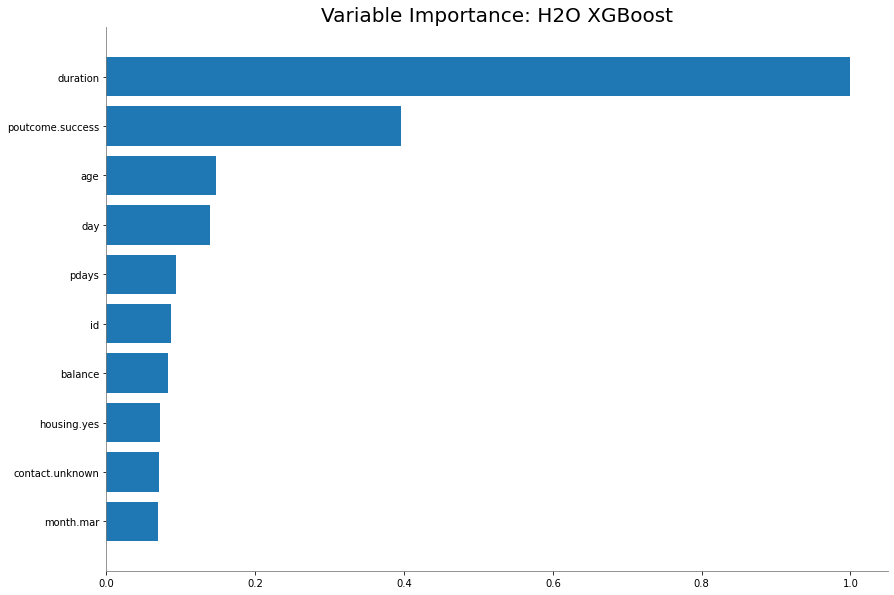

<Figure size 432x288 with 0 Axes>

In [66]:
out.varimp_plot()

In [67]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20220716_81709.zip'

In [68]:
df_pred.columns
df_pred.shape

(18083, 1)

In [69]:
df_pred

predict
0.674422
0.592158
0.0242714
0.0200732
0.112851
0.0296987
-0.00119116
0.0359079
-0.00140802
0.173309


In [70]:
#Convert h2o frame to pandas DataFrame. (Default use_pandas=True)

preds2_as_df = h2o.as_list(df_pred)
sample = preds2_as_df
sample


,predict
0,0.674422
1,0.592158
2,0.024271
3,0.020073
4,0.112851
...,...
18078,-0.001370
18079,0.137394
18080,-0.022418
18081,0.022721


In [71]:
#preds2_as_df.describe

#sample[1] = preds2_as_df[1]

In [72]:
#sample.to_csv("submit6_bank.csv",index=None,header=None)
# indexを1～に振りなおす

sample.index = sample.index + 1
sample.to_csv("submit6_bank.csv",header=None)
